# Basics of Tensorflow

## Tensorflow is long associated with the computational graph. After all Libraries is all about tensors that flow through a graph

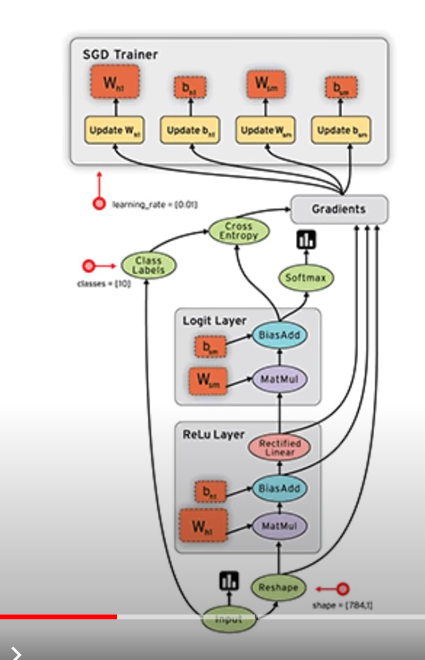

# Tensors

Tensors are multi-dimensional arrays with a uniform type (called a dtype). You can see all supported dtypes at tf.dtypes.DType.

If you're familiar with NumPy, tensors are (kind of) like np.arrays.

All tensors are immutable like Python numbers and strings: you can never update the contents of a tensor, only create a new one.

# Tensor

In TensorFlow, data isn’t stored as integers, floats, or strings. These values are encapsulated in an object called a tensor. In the case of hello_constant = tf.constant('Hello World!'), hello_constant is a 0-dimensional string tensor, but tensors come in a variety of sizes as shown below:



# Session
TensorFlow’s api is built around the idea of a computational graph, a way of visualizing a mathematical process which you learned about in the MiniFlow lesson. 

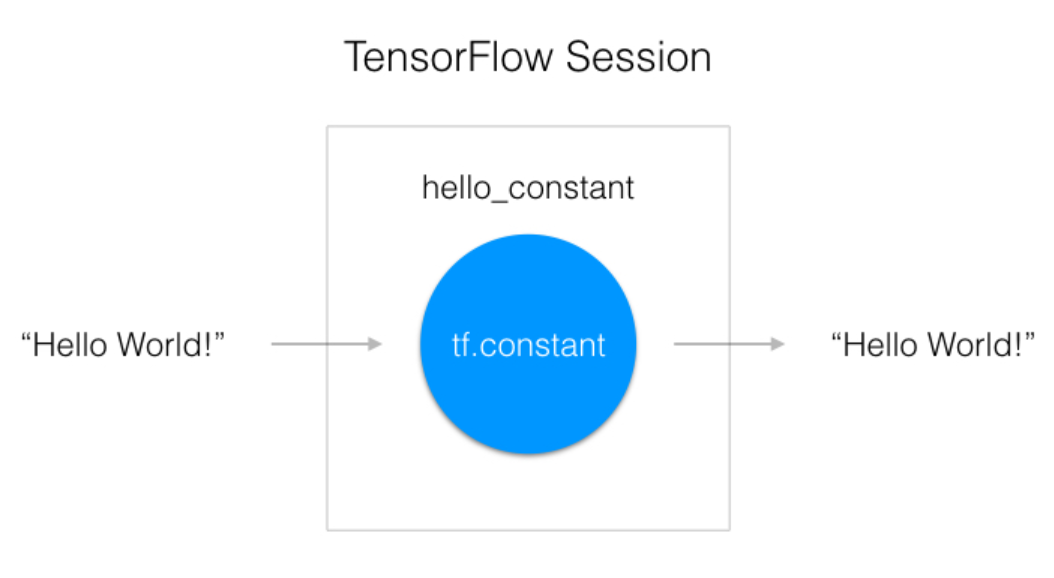

A "TensorFlow Session", as shown above, is an environment for running a graph. The session is in charge of allocating the operations to GPU(s) and/or CPU(s), including remote machines. Let’s see how you use it.



In [2]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
    
a = 20
b = 13
c = tf.add(a,b)
d = tf.multiply(c,a, name = 'Multiply')
e = tf.truediv(d,a, name ='Div') # value will be 33
f = tf.subtract(a,b)

# 1st way to write session

#sess = tf.Session()
#print(sess.run(e)) 
#sess.close()

# 2nd way to write session where you don't need to close the session
with tf.Session() as sess:
    print(sess.run(e))

Instructions for updating:
non-resource variables are not supported in the long term
33.0


### Graph execution is the traditional execution mode in TensorFlow prior to version 2.0. It involves constructing a computational graph, where operations are represented as nodes and data flow between nodes as edges. The graph is then executed within a session using `tf.Session()`.


In Above example while executing print(sess.run(e)) inside session we doesn't need the value of 'f'.

So f = tf.subtract(a,b) will not be executed , it's just initialized. So what it does is, it helps in proper management of computational power and helps us to speed up the code.

### Eager execution is the default execution mode in TensorFlow 2.0 and later versions. With eager execution, operations are executed immediately as they are called, similar to regular Python code.

### Eager execution is enabled by default in TensorFlow 2.0+.


Deferred execution in TensorFlow, whether in graph execution or eager execution, provides a way to define the computations without actually executing them right away. This flexibility allows TensorFlow to optimize the execution, allocate resources efficiently, and provide various optimizations depending on the execution mode and the target hardware platform.

In summary, deferred execution in TensorFlow refers to the behavior where computations are defined first, but their actual execution is delayed until later, allowing for optimizations and efficient resource allocation.


taking previous tensor in next operation we are creating graph, 

ex. d = tf.multiply(c,a, name = 'Multiply') we are taking previous tensor c


## Applying below basic concepts of tenserflow in notebook

1.Run operations in tf.session.

2.Create a constant tensor with tf.constant().

3.Use tf.placeholder() and feed_dict to get input.

4.Apply the tf.add(), tf.subtract(), tf.multiply(), and tf.divide() functions using numeric data.


In [8]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

# Create TensorFlow object called tensor (hello_constant)
hello_constant = tf.constant('Hello World!')

#The code has already created the tensor, hello_constant, from the previous lines. 
#The next step is to evaluate the tensor in a session.
#The code creates a session instance, sess, using tf.Session. The sess.run() function then 
#evaluates the tensor and returns the results.

with tf.Session() as sess:
    # Run the tf.constant operation in the session
    output = sess.run(hello_constant)
    print(output)



b'Hello World!'


In [9]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

x = tf.placeholder(tf.string)
y = tf.placeholder(tf.int32)
z = tf.placeholder(tf.float32)

with tf.Session() as sess:
    output = sess.run(x, feed_dict={x: 'Test String', y: 123, z: 45.67})
    print( x, y, z)
    print('\n output :-> ', output)
    print('\n object type', type(x))
    print('\n x object functionalities', x.__dict__)
    print('\n y object functionalities', y.__dict__)



Tensor("Placeholder_6:0", dtype=string) Tensor("Placeholder_7:0", dtype=int32) Tensor("Placeholder_8:0", dtype=float32)

 output :->  Test String

 object type <class 'tensorflow.python.framework.ops.Tensor'>

 x object functionalities {'_op': <tf.Operation 'Placeholder_6' type=Placeholder>, '_value_index': 0, '_dtype': tf.string, '_tf_output': <tensorflow.python.client._pywrap_tf_session.TF_Output object at 0x000001992D4B56F0>, '_shape_val': TensorShape(None), '_consumers': [], '_id': 30, '_name': 'Placeholder_6:0'}

 y object functionalities {'_op': <tf.Operation 'Placeholder_7' type=Placeholder>, '_value_index': 0, '_dtype': tf.int32, '_tf_output': <tensorflow.python.client._pywrap_tf_session.TF_Output object at 0x000001992D4B5970>, '_shape_val': TensorShape(None), '_consumers': [], '_id': 31, '_name': 'Placeholder_7:0'}


You’ll start with the add function. The tf.add() function does exactly what you expect it to do. It takes in two numbers, two tensors, or one of each, and returns their sum as a tensor.



In [10]:
x = tf.subtract(10, 4) # 6
y = tf.multiply(2, 5)  # 10
print('\n x is :',x, '\ntype of x is:', type(x))
print('\n functionalities of x is -->',x.__dict__)
print('\n')
print('\n y is :',y , '\ntype of y is:', type(x))
print('\n functionalities of y is -->',y.__dict__)



 x is : Tensor("Sub_3:0", shape=(), dtype=int32) 
type of x is: <class 'tensorflow.python.framework.ops.Tensor'>

 functionalities of x is --> {'_op': <tf.Operation 'Sub_3' type=Sub>, '_value_index': 0, '_dtype': tf.int32, '_tf_output': <tensorflow.python.client._pywrap_tf_session.TF_Output object at 0x000001992D49C3B0>, '_shape_val': TensorShape([]), '_consumers': [], '_id': 35, '_name': 'Sub_3:0'}



 y is : Tensor("Mul_1:0", shape=(), dtype=int32) 
type of y is: <class 'tensorflow.python.framework.ops.Tensor'>

 functionalities of y is --> {'_op': <tf.Operation 'Mul_1' type=Mul>, '_value_index': 0, '_dtype': tf.int32, '_tf_output': <tensorflow.python.client._pywrap_tf_session.TF_Output object at 0x000001992D4B26B0>, '_shape_val': TensorShape([]), '_consumers': [], '_id': 38, '_name': 'Mul_1:0'}


Below will give error because the constant 1 is an integer but the constant 2.0 is a floating point value 
and subtract expects them to match.

tf.subtract(tf.constant(2.0),tf.constant(1))

therefore we will use cast to change value to integer

In [12]:

# we will use cast to change value to integer
tf.subtract(tf.cast(tf.constant(2.0),tf.int32),tf.constant(1))

<tf.Tensor 'Sub_5:0' shape=() dtype=int32>